<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/intro-pandas/09_identificando_e_removendo_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificando e Removendo Outliers

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rc('figure', figsize=(14,6))


In [2]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


![boxplot](https://miro.medium.com/max/700/1*2c21SkzJMf3frPXPAR_gZA.png)

* [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

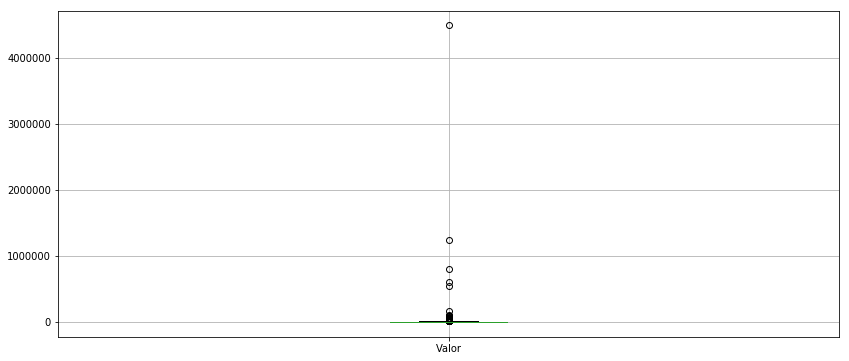

In [3]:
dados.boxplot(['Valor'])

* Como a quantidade de dados discrepantes, não deu para ver o boxplot;

* Vamos criar as estatíticas da imagem anterior e selecionar os valores dentro dos intervalos inferior e superior.

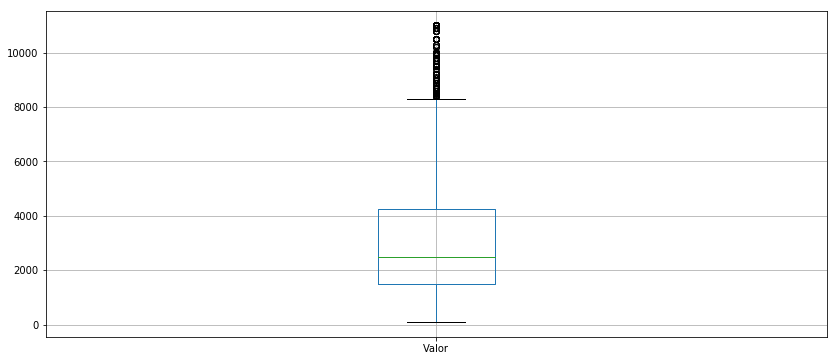

In [6]:
valor = dados['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IQR = Q3 - Q1
limite_inf = Q1 - 1.5*IQR
limite_sup = Q3 + 1.5*IQR

# Selecionar amostra dentro do intervalo
selecao = (valor >= limite_inf) & (valor <= limite_sup)
dados_new = dados[selecao]
dados_new.boxplot(['Valor'])

* Porque apareceu outros **outliers**, como ele recalcula as estatíticas de novo (Mediana, Q1, Q3, IQR) e assim podem aparecer novos **outliers**

> Esses novos **outliers** devem ser analisados com cuidado por parecerem fazer parte da realidade do banco. Talvez distribuir os dados entre alto valor ou coisa do tipo.

* Vamos ver os histogramas antes e depois agora.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa453653780>]],
      dtype=object)

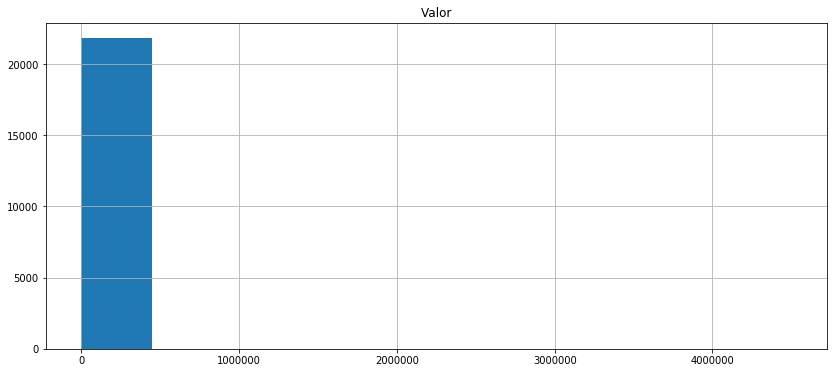

In [8]:
dados.hist(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa455f59f60>]],
      dtype=object)

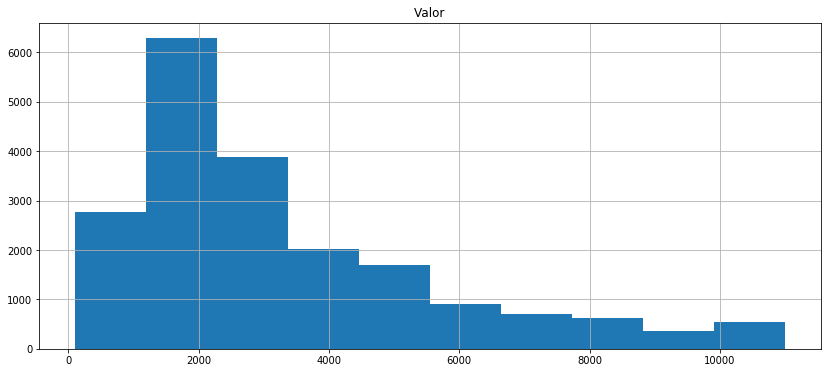

In [7]:
dados_new.hist(['Valor'])

* Os dados parecem mais bem comportados, mesmo assim para fazer uma regressão por exemplo seriam necessários curar mais esses dados.